Q3. Use the CIFAR10 dataset, take 5 classes and perform the classification. Print confusion matrix for 5 classes. [Download Dataset from ​here​] [​ 20 Marks]
Note: Code for Confusion matrix must be done from scratch, else no marks will be awarded.

In [2]:
from tensorflow.keras import datasets
import numpy as np
filtered_images=[]
(train_images, train_labels), (test_images, test_labels)= datasets.cifar10.load_data()
print('Images Shape: {}'.format(train_images.shape))
print('Labels Shape: {}'.format(train_labels.shape))
for i in range(0,5):
  idx = (train_labels == i).reshape(train_images.shape[0])
  # print('Index Shape: {}'.format(idx.shape))
  filtered_images.append(train_images[idx])
print('Filtered Images Shape: {}'.format(np.array(filtered_images).shape))

Images Shape: (50000, 32, 32, 3)
Labels Shape: (50000, 1)
Filtered Images Shape: (5, 5000, 32, 32, 3)


In [3]:
# Train Images
Xtrain_airplane = np.array(filtered_images[0])
Xtrain_automobile = np.array(filtered_images[1])
Xtrain_bird = np.array(filtered_images[2])
Xtrain_cat = np.array(filtered_images[3])
Xtrain_deer = np.array(filtered_images[4])

In [4]:
filtered_labels = []
for i in range(0,5):
  idx = (train_labels == i).reshape(train_labels.shape[0])
  filtered_labels.append(train_labels[idx])
print('Filtered labels Shape: {}'.format(np.array(filtered_labels).shape))


Filtered labels Shape: (5, 5000, 1)


In [5]:
# Train Labels
Ytrain_airplane = filtered_labels[0]
Ytrain_automobile = filtered_labels[1] 
Ytrain_bird = filtered_labels[2]
Ytrain_cat = filtered_labels[3]
Ytrain_deer = filtered_labels[4]

In [6]:
filtered_images_test = []
for i in range(0,5):
  idx = (test_labels == i).reshape(test_images.shape[0])
  # print('Index Shape: {}'.format(idx.shape))
  filtered_images_test.append(test_images[idx])
print('Filtered Images Shape: {}'.format(np.array(filtered_images_test).shape))

Filtered Images Shape: (5, 1000, 32, 32, 3)


In [7]:
# Test Images
Xtest_airplane = np.array(filtered_images_test[0])
Xtest_automobile = np.array(filtered_images_test[1])
Xtest_bird = np.array(filtered_images_test[2])
Xtest_cat = np.array(filtered_images_test[3])
Xtest_deer = np.array(filtered_images_test[4])

In [8]:
filtered_labels_test = []
for i in range(0,5):
  idx = (test_labels == i).reshape(test_labels.shape[0])
  filtered_labels_test.append(test_labels[idx])
print('Filtered labels Shape: {}'.format(np.array(filtered_labels_test).shape))


Filtered labels Shape: (5, 1000, 1)


In [9]:
# Test Labels
Ytest_airplane = filtered_labels_test[0]
Ytest_automobile = filtered_labels_test[1]
Ytest_bird = filtered_labels_test[2]
Ytest_cat = filtered_labels_test[3]
Ytest_deer = filtered_labels_test[4]

In [10]:
X_train = np.concatenate((Xtrain_airplane,
                          Xtrain_automobile,
                          Xtrain_bird,
                          Xtrain_cat,
                          Xtrain_deer))

Y_train = np.concatenate((Ytrain_airplane,
                          Ytrain_automobile,
                          Ytrain_bird,
                          Ytrain_cat,
                          Ytrain_deer))

X_test = np.concatenate((Xtest_airplane,
                          Xtest_automobile,
                          Xtest_bird,
                          Xtest_cat,
                          Xtest_deer))

Y_test = np.concatenate((Ytest_airplane,
                          Ytest_automobile,
                          Ytest_bird,
                          Ytest_cat,
                          Ytest_deer))
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(25000, 32, 32, 3)
(25000, 1)
(5000, 32, 32, 3)
(5000, 1)


Hurray! We have completed the preprocessing of the data

In [11]:
classes = ["airplane",#0
           "automobile",#1
           "bird",#2
           "cat",#3
           "deer",#4
           ]


from question 1 we have learned that we will be dealing with class labels and plotting images multiple times. Thus we can define a function which will handle label and image showing.


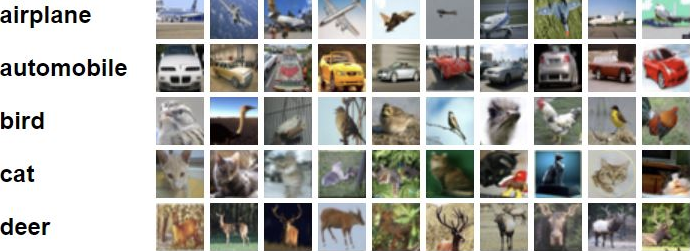

In [12]:
import matplotlib.pyplot as plt
import numpy as np
def show_label_and_image(X,Y,index):
  print("The image in training set is desiplayed as:")
  plt.imshow(np.array(X[index]))
  print("The label associated with this image is in training set:")
  print(Y[index][0])
  print(classes[Y[index][0]])


The image in training set is desiplayed as:
The label associated with this image is in training set:
0
airplane


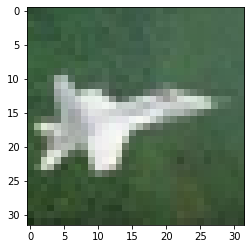

In [13]:
show_label_and_image(X_train, Y_train, 4)

In [14]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Considering 5 classes as: "airplane",#0
           "automobile",#1
           "bird",#2
           "cat",#3
           "deer",#4

In [18]:
import tensorflow as tf
from tensorflow.keras import layers, models

ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(256, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, Y_train, epochs=10)

Epoch 1/10
782/782 [==============================] - 5s 6ms/step - loss: 1.4584 - accuracy: 0.3935
Epoch 2/10
782/782 [==============================] - 5s 6ms/step - loss: 1.1908 - accuracy: 0.5275
Epoch 3/10
782/782 [==============================] - 5s 6ms/step - loss: 1.1268 - accuracy: 0.5511
Epoch 4/10
782/782 [==============================] - 5s 6ms/step - loss: 1.0755 - accuracy: 0.5796
Epoch 5/10
782/782 [==============================] - 5s 6ms/step - loss: 1.0421 - accuracy: 0.5915
Epoch 6/10
782/782 [==============================] - 5s 6ms/step - loss: 1.0208 - accuracy: 0.5966
Epoch 7/10
782/782 [==============================] - 4s 6ms/step - loss: 0.9764 - accuracy: 0.6201
Epoch 8/10
782/782 [==============================] - 5s 6ms/step - loss: 0.9544 - accuracy: 0.6228
Epoch 9/10
782/782 [==============================] - 5s 6ms/step - loss: 0.9371 - accuracy: 0.6351
Epoch 10/10
782/782 [==============================] - 5s 6ms/step - loss: 0.9133 - accuracy: 0.6420

# Evaluation Metrics using inbuilt function

Classification Report: 
               precision    recall  f1-score   support

           0       0.65      0.74      0.69      1000
           1       0.82      0.75      0.78      1000
           2       0.55      0.38      0.45      1000
           3       0.55      0.72      0.62      1000
           4       0.57      0.55      0.56      1000

    accuracy                           0.63      5000
   macro avg       0.63      0.63      0.62      5000
weighted avg       0.63      0.63      0.62      5000

Confusion Matrix: 
 [[738  59  54 100  49]
 [133 750  17  74  26]
 [117  33 377 233 240]
 [ 56  45  83 721  95]
 [ 89  24 151 185 551]]
along x axis - predicted, along y axis - Actual


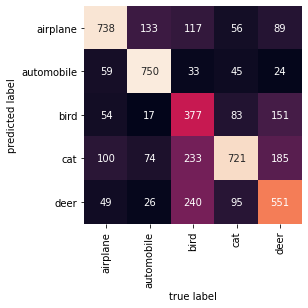

In [24]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(Y_test, y_pred_classes))
print("Confusion Matrix: \n", confusion_matrix(Y_test, y_pred_classes))
print("along x axis - predicted, along y axis - Actual")

import seaborn as sns

matrix = confusion_matrix(Y_test, y_pred_classes)
sns.heatmap(matrix, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=classes,
            yticklabels=classes)
plt.xlabel('true label')
plt.ylabel('predicted label');

# Evaluation Metrics and Confusion matrix
 without using inbuilt function

In [25]:
# This is what we have as of now
Y_actual = Y_test
Y_pred = y_pred_classes


In [27]:
print(len(Y_actual))
print(len(Y_pred))

5000
5000


In [38]:
# np.array(Y_actual[:,0])
Y_pred
import pandas as pd
data = {
    'Y_actual': Y_actual[:,0],
    'Y_pred': Y_pred
}
df = pd.DataFrame(data, columns=['Y_actual','Y_pred'])


In [52]:
count=0
for i in range(5000):
  if(df.Y_actual.iloc[i] == df.Y_pred.iloc[i]):
    count=count+1
  else:
    pass
print(count)
print("out of 5000 are correctly classified")

3137
out of 5000 are correctly classified


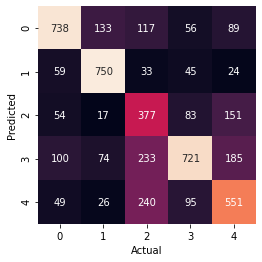

In [61]:

confusion_matrix = pd.crosstab(df['Y_pred'], df['Y_actual'], rownames=['Predicted'], colnames=['Actual'])

sns.heatmap(confusion_matrix, annot=True, square=True, fmt='d', cbar=False,)
plt.show()

In [63]:
confusion_matrix

Actual,0,1,2,3,4
Predicted,,,,,
0,738,133,117,56,89
1,59,750,33,45,24
2,54,17,377,83,151
3,100,74,233,721,185
4,49,26,240,95,551


In [82]:
Y_actual = Y_actual[:,0].tolist()

In [83]:
Y_pred = Y_pred

In [89]:
rows, cols = (5, 5)
labels = np.array([0,1,2,3,4])
# arr = [[0]*cols]*rows 
arr = np.zeros((len(labels), len(labels)))
for i in range(rows):
  for j in range(cols):
    arr[i,j] = np.sum((Y_actual == labels[i]) & (Y_pred == labels[j]))  

np.array(arr).T

array([[738., 133., 117.,  56.,  89.],
       [ 59., 750.,  33.,  45.,  24.],
       [ 54.,  17., 377.,  83., 151.],
       [100.,  74., 233., 721., 185.],
       [ 49.,  26., 240.,  95., 551.]])

In [ ]:
# # Dont know why this did not work????
# rows, cols = (5, 5)
# labels = np.array([0,1,2,3,4])
# arr = [[0]*cols]*rows 
# # arr = np.zeros((len(labels), len(labels)))
# for i in range(rows):
#   for j in range(cols):
#     arr[i][j] = np.sum((Y_actual == labels[i]) & (Y_pred == labels[j]))  

# np.array(arr).T

In [16]:
# This will waste a lot of time, dont go with this approach :(  
# # cifar10_list[0][1][i][0]
# for i in range (0,50000):
#   if(cifar10_list[0][1][i][0]>4):
#     np.delete(cifar10_list[0][1], i)
#     np.delete(cifar10_list[0][0], i)
#     print("deleted", cifar10_list[0][1][i][0])
# # cifar10_list[0][1]
# # cifar10_list[0][0]
# print(len(cifar10_list[0][1]), " in Train Dataset after deletion") 

In [17]:
# This will waste a lot of time, dont go with this approach :(  
# # cifar10_list[1][1][i][0]
# for i in range (0,10000):
#   if(cifar10_list[1][1][i][0]>4):
#     np.delete(cifar10_list[1][1], i)
#     np.delete(cifar10_list[1][0], i)
# # cifar10_list[0][1]
# # cifar10_list[0][0]
# print(len(cifar10_list[1][1]), " in Test Dataset after deletion") 